In [223]:
import pandas as pd
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

In [20]:
df = pd.read_table('dataverse_files/complexity.txt', sep='\t')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Columns: 135 entries, stimulusId to not_na
dtypes: float64(133), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
df.head(100)

,stimulusId,04216f4b0750cd0f,0ffc79887d376a8a,12279eed19621619,1780034fbdd52f28,1af5518950a7e9ee,2276d8eb2a3a6c5c,64aaafe168a91a73,66cb6a04b74c9e22,6cfb3a289d4cdb4b,857072d945420e2a,898f5df1f0ab5b1a,89f42d3e9525df6f,914fc6735f47a228,94163974cdda30fb,98be24985ce61b02,a8fdf043cfaa682e,dcd57fc637c59b5e,ee55d0f727457c28,f1397e1a46dea18d,f5262cef7ee5065d,faa3d3e6b0728517,338c4a5584abfa09,41278695282ffca8,b9b518487a19854d,1980bbfeca3b37e7,2bac958aa267efea,32575695bc19a263,445b8ac30a673d16,6887627e3c742729,9fa2797cd30a7dc1,a75bbb5a5ccf4ba7,ad8df661c1e25ab1,c6f360220a2d6e37,ebcb3db43d518b4a,81bebe566728be80,c1b0bb471c64bd23,58fede1374ab065d,0c0d4d9492b8e11f,12ee9d8b2910b7cc,131f9eec74edd292,170d632bdbd7c994,23076495ffa79f42,2e2e53ad2c2e4394,2e309b901c8ea3e2,31fc360c54f4285c,3648f31d7588daee,36f387864b477d2f,39a0de2d1049fb4f,39bb45afd27eb46a,5010b4e1e7573ce3,51e5ac4c6250c438,5c6b76234c2937db,5c8d540ec8e434ca,61700fa5afd586fc,66acaa46449400a6,69ad5d772b3a0669,82b032c5777f30db,8960ae0607c6307d,905707927b97c7b9,93ac7b02e6f76eea,9a754a22dd6d67d2,b09e04c93d3a8605,b4933c4f7d65e5ac,be9f6e660477e213,c286db26353acf9a,c86eef3f6a107630,c94b25b0b920d498,ca10f6c73f538455,d16a586a096d025b,d6c57d1d2328bdbb,e41d706a123574e6,ebaebf7f100e22a5,ed34e32cb70cacdf,f5cb1b46ed9d489a,f96ecfe331cb2fd0,fe54bb5596627a58,03ae2661050e2bc4,070ed88e3581a86d,31c4a4d210ba0fff,41ff04113c6522bd,42920ce88c2e16ae,8b69042011a9ea33,b8d7f9e80035bcbc,ea8d711b384b5992,f1249742785c46af,302fda1fae5323fb,675829acdd018522,6dc4337a61ffdedc,8e7bd069043a6898,a34e7dac709d1687,ae9bdc530fee60bb,dec0a9c372c5785f,dfe429564130eef9,fc61c1fafe9bb86d,fde2845249471a2d,572c7cc03ced6b72,5ae771ced5bedd6b,a6f4f79352725bb1,c26b41de0a0813ab,c74555dde1bb9f2e,c8e0801f52f2351d,cbdcb15260247e69,1fff21a28ac30506,8ee5e0c041c6a936,bdc4f5c53ff05a00,d14bfffc2d845a74,dac4d30e56bdb565,e2453aa141756c2f,586e5526ede5ae31,58f3e60779bc2952,78b3e1c18063b7f6,7ae85a7b4f364f53,7e76525fb1f798f4,feaadbbda0fade64,05edcbf8fa2c0fa4,638632e1b5b9d72c,70279febc31d4bc3,a9cf88b8f09a8746,bfd891f83a2b98c7,d1cac5e03aef7ca9,fbee41a0f8e609f4,018bafcb6eeb823f,168a77d3716a963d,25b954091042fb3a,467753738569d99e,66604efdc4d11c83,67bfecf3b5943380,817b1f4c10f62fd2,a3d39264aec4f109,a5dd3da59ef54d69,af6a75f47a150e64,b969dddf16b92d89,e79884377e20f861
0,AVI_14_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1,AVI_14_10.png,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN
2,AVI_14_100.png,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVI_14_101.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
df.iloc[0,1:]

,stimulusId,04216f4b0750cd0f,0ffc79887d376a8a,12279eed19621619,1780034fbdd52f28,1af5518950a7e9ee,2276d8eb2a3a6c5c,64aaafe168a91a73,66cb6a04b74c9e22,6cfb3a289d4cdb4b,857072d945420e2a,898f5df1f0ab5b1a,89f42d3e9525df6f,914fc6735f47a228,94163974cdda30fb,98be24985ce61b02,a8fdf043cfaa682e,dcd57fc637c59b5e,ee55d0f727457c28,f1397e1a46dea18d,f5262cef7ee5065d,faa3d3e6b0728517,338c4a5584abfa09,41278695282ffca8,b9b518487a19854d,1980bbfeca3b37e7,2bac958aa267efea,32575695bc19a263,445b8ac30a673d16,6887627e3c742729,9fa2797cd30a7dc1,a75bbb5a5ccf4ba7,ad8df661c1e25ab1,c6f360220a2d6e37,ebcb3db43d518b4a,81bebe566728be80,c1b0bb471c64bd23,58fede1374ab065d,0c0d4d9492b8e11f,12ee9d8b2910b7cc,131f9eec74edd292,170d632bdbd7c994,23076495ffa79f42,2e2e53ad2c2e4394,2e309b901c8ea3e2,31fc360c54f4285c,3648f31d7588daee,36f387864b477d2f,39a0de2d1049fb4f,39bb45afd27eb46a,5010b4e1e7573ce3,51e5ac4c6250c438,5c6b76234c2937db,5c8d540ec8e434ca,61700fa5afd586fc,66acaa46449400a6,69ad5d772b3a0669,82b032c5777f30db,8960ae0607c6307d,905707927b97c7b9,93ac7b02e6f76eea,9a754a22dd6d67d2,b09e04c93d3a8605,b4933c4f7d65e5ac,be9f6e660477e213,c286db26353acf9a,c86eef3f6a107630,c94b25b0b920d498,ca10f6c73f538455,d16a586a096d025b,d6c57d1d2328bdbb,e41d706a123574e6,ebaebf7f100e22a5,ed34e32cb70cacdf,f5cb1b46ed9d489a,f96ecfe331cb2fd0,fe54bb5596627a58,03ae2661050e2bc4,070ed88e3581a86d,31c4a4d210ba0fff,41ff04113c6522bd,42920ce88c2e16ae,8b69042011a9ea33,b8d7f9e80035bcbc,ea8d711b384b5992,f1249742785c46af,302fda1fae5323fb,675829acdd018522,6dc4337a61ffdedc,8e7bd069043a6898,a34e7dac709d1687,ae9bdc530fee60bb,dec0a9c372c5785f,dfe429564130eef9,fc61c1fafe9bb86d,fde2845249471a2d,572c7cc03ced6b72,5ae771ced5bedd6b,a6f4f79352725bb1,c26b41de0a0813ab,c74555dde1bb9f2e,c8e0801f52f2351d,cbdcb15260247e69,1fff21a28ac30506,8ee5e0c041c6a936,bdc4f5c53ff05a00,d14bfffc2d845a74,dac4d30e56bdb565,e2453aa141756c2f,586e5526ede5ae31,58f3e60779bc2952,78b3e1c18063b7f6,7ae85a7b4f364f53,7e76525fb1f798f4,feaadbbda0fade64,05edcbf8fa2c0fa4,638632e1b5b9d72c,70279febc31d4bc3,a9cf88b8f09a8746,bfd891f83a2b98c7,d1cac5e03aef7ca9,fbee41a0f8e609f4,018bafcb6eeb823f,168a77d3716a963d,25b954091042fb3a,467753738569d99e,66604efdc4d11c83,67bfecf3b5943380,817b1f4c10f62fd2,a3d39264aec4f109,a5dd3da59ef54d69,af6a75f47a150e64,b969dddf16b92d89,e79884377e20f861
0,AVI_14_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1,AVI_14_10.png,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN


In [21]:
df['sum'] = df.iloc[:,1:].apply(lambda row: row.sum(),axis=1)
df['not_na'] = df.iloc[:,1:-1].apply(lambda row:sum(pd.notnull(row)),axis=1)


In [22]:
df.head(3)

,stimulusId,04216f4b0750cd0f,0ffc79887d376a8a,12279eed19621619,1780034fbdd52f28,1af5518950a7e9ee,2276d8eb2a3a6c5c,64aaafe168a91a73,66cb6a04b74c9e22,6cfb3a289d4cdb4b,857072d945420e2a,898f5df1f0ab5b1a,89f42d3e9525df6f,914fc6735f47a228,94163974cdda30fb,98be24985ce61b02,a8fdf043cfaa682e,dcd57fc637c59b5e,ee55d0f727457c28,f1397e1a46dea18d,f5262cef7ee5065d,faa3d3e6b0728517,338c4a5584abfa09,41278695282ffca8,b9b518487a19854d,1980bbfeca3b37e7,2bac958aa267efea,32575695bc19a263,445b8ac30a673d16,6887627e3c742729,9fa2797cd30a7dc1,a75bbb5a5ccf4ba7,ad8df661c1e25ab1,c6f360220a2d6e37,ebcb3db43d518b4a,81bebe566728be80,c1b0bb471c64bd23,58fede1374ab065d,0c0d4d9492b8e11f,12ee9d8b2910b7cc,131f9eec74edd292,170d632bdbd7c994,23076495ffa79f42,2e2e53ad2c2e4394,2e309b901c8ea3e2,31fc360c54f4285c,3648f31d7588daee,36f387864b477d2f,39a0de2d1049fb4f,39bb45afd27eb46a,5010b4e1e7573ce3,51e5ac4c6250c438,5c6b76234c2937db,5c8d540ec8e434ca,61700fa5afd586fc,66acaa46449400a6,69ad5d772b3a0669,82b032c5777f30db,8960ae0607c6307d,905707927b97c7b9,93ac7b02e6f76eea,9a754a22dd6d67d2,b09e04c93d3a8605,b4933c4f7d65e5ac,be9f6e660477e213,c286db26353acf9a,c86eef3f6a107630,c94b25b0b920d498,ca10f6c73f538455,d16a586a096d025b,d6c57d1d2328bdbb,e41d706a123574e6,ebaebf7f100e22a5,ed34e32cb70cacdf,f5cb1b46ed9d489a,f96ecfe331cb2fd0,fe54bb5596627a58,03ae2661050e2bc4,070ed88e3581a86d,31c4a4d210ba0fff,41ff04113c6522bd,42920ce88c2e16ae,8b69042011a9ea33,b8d7f9e80035bcbc,ea8d711b384b5992,f1249742785c46af,302fda1fae5323fb,675829acdd018522,6dc4337a61ffdedc,8e7bd069043a6898,a34e7dac709d1687,ae9bdc530fee60bb,dec0a9c372c5785f,dfe429564130eef9,fc61c1fafe9bb86d,fde2845249471a2d,572c7cc03ced6b72,5ae771ced5bedd6b,a6f4f79352725bb1,c26b41de0a0813ab,c74555dde1bb9f2e,c8e0801f52f2351d,cbdcb15260247e69,1fff21a28ac30506,8ee5e0c041c6a936,bdc4f5c53ff05a00,d14bfffc2d845a74,dac4d30e56bdb565,e2453aa141756c2f,586e5526ede5ae31,58f3e60779bc2952,78b3e1c18063b7f6,7ae85a7b4f364f53,7e76525fb1f798f4,feaadbbda0fade64,05edcbf8fa2c0fa4,638632e1b5b9d72c,70279febc31d4bc3,a9cf88b8f09a8746,bfd891f83a2b98c7,d1cac5e03aef7ca9,fbee41a0f8e609f4,018bafcb6eeb823f,168a77d3716a963d,25b954091042fb3a,467753738569d99e,66604efdc4d11c83,67bfecf3b5943380,817b1f4c10f62fd2,a3d39264aec4f109,a5dd3da59ef54d69,af6a75f47a150e64,b969dddf16b92d89,e79884377e20f861,sum,not_na
0,AVI_14_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,46.0,9
1,AVI_14_10.png,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,53.5,11
2,AVI_14_100.png,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,10


In [23]:
df['average'] = df['sum'] / df['not_na']

In [24]:
df.head(3)

,stimulusId,04216f4b0750cd0f,0ffc79887d376a8a,12279eed19621619,1780034fbdd52f28,1af5518950a7e9ee,2276d8eb2a3a6c5c,64aaafe168a91a73,66cb6a04b74c9e22,6cfb3a289d4cdb4b,857072d945420e2a,898f5df1f0ab5b1a,89f42d3e9525df6f,914fc6735f47a228,94163974cdda30fb,98be24985ce61b02,a8fdf043cfaa682e,dcd57fc637c59b5e,ee55d0f727457c28,f1397e1a46dea18d,f5262cef7ee5065d,faa3d3e6b0728517,338c4a5584abfa09,41278695282ffca8,b9b518487a19854d,1980bbfeca3b37e7,2bac958aa267efea,32575695bc19a263,445b8ac30a673d16,6887627e3c742729,9fa2797cd30a7dc1,a75bbb5a5ccf4ba7,ad8df661c1e25ab1,c6f360220a2d6e37,ebcb3db43d518b4a,81bebe566728be80,c1b0bb471c64bd23,58fede1374ab065d,0c0d4d9492b8e11f,12ee9d8b2910b7cc,131f9eec74edd292,170d632bdbd7c994,23076495ffa79f42,2e2e53ad2c2e4394,2e309b901c8ea3e2,31fc360c54f4285c,3648f31d7588daee,36f387864b477d2f,39a0de2d1049fb4f,39bb45afd27eb46a,5010b4e1e7573ce3,51e5ac4c6250c438,5c6b76234c2937db,5c8d540ec8e434ca,61700fa5afd586fc,66acaa46449400a6,69ad5d772b3a0669,82b032c5777f30db,8960ae0607c6307d,905707927b97c7b9,93ac7b02e6f76eea,9a754a22dd6d67d2,b09e04c93d3a8605,b4933c4f7d65e5ac,be9f6e660477e213,c286db26353acf9a,c86eef3f6a107630,c94b25b0b920d498,ca10f6c73f538455,d16a586a096d025b,d6c57d1d2328bdbb,e41d706a123574e6,ebaebf7f100e22a5,ed34e32cb70cacdf,f5cb1b46ed9d489a,f96ecfe331cb2fd0,fe54bb5596627a58,03ae2661050e2bc4,070ed88e3581a86d,31c4a4d210ba0fff,41ff04113c6522bd,42920ce88c2e16ae,8b69042011a9ea33,b8d7f9e80035bcbc,ea8d711b384b5992,f1249742785c46af,302fda1fae5323fb,675829acdd018522,6dc4337a61ffdedc,8e7bd069043a6898,a34e7dac709d1687,ae9bdc530fee60bb,dec0a9c372c5785f,dfe429564130eef9,fc61c1fafe9bb86d,fde2845249471a2d,572c7cc03ced6b72,5ae771ced5bedd6b,a6f4f79352725bb1,c26b41de0a0813ab,c74555dde1bb9f2e,c8e0801f52f2351d,cbdcb15260247e69,1fff21a28ac30506,8ee5e0c041c6a936,bdc4f5c53ff05a00,d14bfffc2d845a74,dac4d30e56bdb565,e2453aa141756c2f,586e5526ede5ae31,58f3e60779bc2952,78b3e1c18063b7f6,7ae85a7b4f364f53,7e76525fb1f798f4,feaadbbda0fade64,05edcbf8fa2c0fa4,638632e1b5b9d72c,70279febc31d4bc3,a9cf88b8f09a8746,bfd891f83a2b98c7,d1cac5e03aef7ca9,fbee41a0f8e609f4,018bafcb6eeb823f,168a77d3716a963d,25b954091042fb3a,467753738569d99e,66604efdc4d11c83,67bfecf3b5943380,817b1f4c10f62fd2,a3d39264aec4f109,a5dd3da59ef54d69,af6a75f47a150e64,b969dddf16b92d89,e79884377e20f861,sum,not_na,average
0,AVI_14_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,46.0,9,5.111111
1,AVI_14_10.png,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,53.5,11,4.863636
2,AVI_14_100.png,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,10,2.800000


In [82]:
high_complexity = df[df['average'] > 5]

In [83]:
len(high_complexity)

184

In [81]:
high_complexity

,stimulusId,04216f4b0750cd0f,0ffc79887d376a8a,12279eed19621619,1780034fbdd52f28,1af5518950a7e9ee,2276d8eb2a3a6c5c,64aaafe168a91a73,66cb6a04b74c9e22,6cfb3a289d4cdb4b,857072d945420e2a,898f5df1f0ab5b1a,89f42d3e9525df6f,914fc6735f47a228,94163974cdda30fb,98be24985ce61b02,a8fdf043cfaa682e,dcd57fc637c59b5e,ee55d0f727457c28,f1397e1a46dea18d,f5262cef7ee5065d,faa3d3e6b0728517,338c4a5584abfa09,41278695282ffca8,b9b518487a19854d,1980bbfeca3b37e7,2bac958aa267efea,32575695bc19a263,445b8ac30a673d16,6887627e3c742729,9fa2797cd30a7dc1,a75bbb5a5ccf4ba7,ad8df661c1e25ab1,c6f360220a2d6e37,ebcb3db43d518b4a,81bebe566728be80,c1b0bb471c64bd23,58fede1374ab065d,0c0d4d9492b8e11f,12ee9d8b2910b7cc,131f9eec74edd292,170d632bdbd7c994,23076495ffa79f42,2e2e53ad2c2e4394,2e309b901c8ea3e2,31fc360c54f4285c,3648f31d7588daee,36f387864b477d2f,39a0de2d1049fb4f,39bb45afd27eb46a,5010b4e1e7573ce3,51e5ac4c6250c438,5c6b76234c2937db,5c8d540ec8e434ca,61700fa5afd586fc,66acaa46449400a6,69ad5d772b3a0669,82b032c5777f30db,8960ae0607c6307d,905707927b97c7b9,93ac7b02e6f76eea,9a754a22dd6d67d2,b09e04c93d3a8605,b4933c4f7d65e5ac,be9f6e660477e213,c286db26353acf9a,c86eef3f6a107630,c94b25b0b920d498,ca10f6c73f538455,d16a586a096d025b,d6c57d1d2328bdbb,e41d706a123574e6,ebaebf7f100e22a5,ed34e32cb70cacdf,f5cb1b46ed9d489a,f96ecfe331cb2fd0,fe54bb5596627a58,03ae2661050e2bc4,070ed88e3581a86d,31c4a4d210ba0fff,41ff04113c6522bd,42920ce88c2e16ae,8b69042011a9ea33,b8d7f9e80035bcbc,ea8d711b384b5992,f1249742785c46af,302fda1fae5323fb,675829acdd018522,6dc4337a61ffdedc,8e7bd069043a6898,a34e7dac709d1687,ae9bdc530fee60bb,dec0a9c372c5785f,dfe429564130eef9,fc61c1fafe9bb86d,fde2845249471a2d,572c7cc03ced6b72,5ae771ced5bedd6b,a6f4f79352725bb1,c26b41de0a0813ab,c74555dde1bb9f2e,c8e0801f52f2351d,cbdcb15260247e69,1fff21a28ac30506,8ee5e0c041c6a936,bdc4f5c53ff05a00,d14bfffc2d845a74,dac4d30e56bdb565,e2453aa141756c2f,586e5526ede5ae31,58f3e60779bc2952,78b3e1c18063b7f6,7ae85a7b4f364f53,7e76525fb1f798f4,feaadbbda0fade64,05edcbf8fa2c0fa4,638632e1b5b9d72c,70279febc31d4bc3,a9cf88b8f09a8746,bfd891f83a2b98c7,d1cac5e03aef7ca9,fbee41a0f8e609f4,018bafcb6eeb823f,168a77d3716a963d,25b954091042fb3a,467753738569d99e,66604efdc4d11c83,67bfecf3b5943380,817b1f4c10f62fd2,a3d39264aec4f109,a5dd3da59ef54d69,af6a75f47a150e64,b969dddf16b92d89,e79884377e20f861,sum,not_na,average
184,CHI_13_138.png,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,6.0,NaN,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,75.0,11,6.818182
246,CHI_13_194.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,6.0,NaN,5.0,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,56.0,9,6.222222
311,CHI_13_252.png,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,45.0,7,6.428571
442,CH

In [293]:
sort_df = df.sort_values("average", ascending=False, method="first")

TypeError: sort_values() got an unexpected keyword argument 'method'

In [287]:
sort_df[df].head(0)

,stimulusId,average
1187,ICWE_19_361.png,6.833333
184,CHI_13_138.png,6.818182
311,CHI_13_252.png,6.428571
780,CHI_20_216.png,6.375000
730,CHI_20_166.png,6.285714
442,CHI_13_56.png,6.272727
246,CHI_13_194.png,6.222222
1361,IJHCS_12_art255.png,6.200000
802,CHI_20_238.png,6.062500
1462,IJHCS_12_bus37.png,6.050000


In [288]:
result = sort_df[['stimulusId', 'average']].head(-20)

In [292]:
sort_df.iloc[sort_df['stimulusId']=='AVI_14_20.png']

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [25]:
AVI_dataset = df[df['stimulusId'].str.startswith('AVI_14')]
len(AVI_dataset)

140

In [26]:
AVI_dataset[['stimulusId', 'average']]

,stimulusId,average
0,AVI_14_1.png,5.111111
1,AVI_14_10.png,4.863636
2,AVI_14_100.png,2.800000
3,AVI_14_101.png,2.500000
4,AVI_14_102.png,3.000000
5,AVI_14_103.png,2.666667
6,AVI_14_104.png,3.111111
7,AVI_14_105.png,2.625000
8,AVI_14_106.png,3.888889
9,AVI_14_107.png,3.666667


In [278]:
df_aesthetics = pd.read_table('dataverse_files/aesthetics.txt', sep='\t')
len(df_aesthetics)

1506

KeyError: 'average'

In [281]:
df_aesthetics['sum'] = df_aesthetics.iloc[:,1:].apply(lambda row: row.sum(),axis=1)
df_aesthetics['not_na'] = df_aesthetics.iloc[:,1:-1].apply(lambda row:sum(pd.notnull(row)),axis=1)
df_aesthetics['average'] = df_aesthetics['sum'] / df_aesthetics['not_na']

In [282]:
df_aesthetics.head(3)

,stimulusId,087bfd3ada42fc6b,1296c0ef3f8aeb76,1c3d3517944a0bc7,1ce91d61fc03ca7e,37d9e24e532e1de0,4a416aa09532af4c,4b31e8dbac3ab9d4,5aa76763afd5cc3d,6f1ed6f127a7cab2,77aaa881b53c8323,8b5c6e3ab9a94afe,9649e8cf0cbebab2,a0978355507bea53,a425724a50657cb0,a5f74ea4e90b3ff2,b0c9385f6adc9bbc,c19adbafd5600500,c4b85e9368ef3bed,d3bb1f6f1e96199d,d40dbd276d157b6e,dfaabe5606855d29,e05f369b177a5a9c,fbe9cdf197982aae,3d6049362a956cbd,3ff4ba084df7ba2b,681c8450ca765fe2,b084cd111d10033e,f26f5a5f60d5b840,0991b683b78740d8,1ea91c835bb79d38,7bdb38af5272f4e0,a3461d8221d426c4,d17c1badd06a54aa,c7bfa5eecd09aa5d,0198b2db956405f1,0fc13c40226a1b67,3404ed1c0e5311fc,3d4c177ff64a2a18,432108595229d2de,48149a12d777b456,50bf2f248f7f284b,54a4ca2232e7d98a,5cfece9235290bd2,63e9b804a052eff0,653923896fdea67c,65d1ca844e2bc335,6c020c21367087bd,72cb5d72c6cb4ed8,76637734469937a1,816b4ebb4dd287e6,81fca7f8db97fe8f,8ab07def74c32b04,8e457fabc51bd5bd,95ee8254257d1ed0,a3f7493e35acadb1,a40e93a5dd550957,a6aef4c087340e02,b1b981ce4da90baa,b36a871574df6d44,b5ed6976cfd02c26,bd5bdb13c2d865a0,bec07a0ce88e5b34,c84b30689fd047b0,cb4d2a4449c6d58d,cbeb59fd025ac87c,d09db9576375cd6c,d14a243501d0ae1d,e1f27bee535280fe,e81586ca5bf50084,f9d6110d6048148c,fcb153b0e25599c5,045f82b9a150ccd7,09b87231ccdcceec,1a9227adfc2ccfc8,24f64062ce4c7d1f,3a5fac959740870b,4cefc426ff630eee,592b35572c14f401,8bc5fe0baba12580,a25b60f782975488,a9d7e71f4d338351,ac943b73a843f6ca,b962d30887cd3608,bfc1e399ab3018d4,cd6d38b5cee3d096,cee889f0ebb4f195,48fc503d7d758e3b,6b7cd283ff56a920,74de57356521e8d9,c11cf88b875b62c4,dc45824a713c17be,ddaf60bbd2bacbb6,f1f70de6a72db771,7cee632c8eebc2d9,7f4e92b043669e8e,817560c7dc18b7c5,a6cf6762fe88edff,07cf83baaa4b1a83,0929caba546162f8,2de3acf53269d70f,4da7c35d401ae4d8,6f6b4b15c3860408,7a79c15bc6b67876,a7e81532fe3bcfbb,c3e0a00f9779a2b0,e0c4e011619b3bab,e6ae10a3c513e044,3262b701297fcc63,e23ab1c4aaf8b97b,36cd7aa2fece1e7a,3d268a212eb85d50,5cd07dea60830b7f,6a3a9b9afd3031ce,cf4b47b5b2944836,d832d42c9a4bdf59,e3700c28606223e8,f0197b6b429a2619,f244bc33f879af94,ff6cbcf447072b4c,0cf127db4cc51bb8,16a3d8a5096203b2,433423a38b509577,4f04bff37ae6de8a,5678ccdd661e190a,701ad86dcc31bb52,717d1b3d02446149,9b098ab47a23cfb7,c48f00b48719fb2f,sum,not_na,average
0,AVI_14_1.png,3.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.5,8,2.187500
1,AVI_14_10.png,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,40.0,11,3.636364
2,AVI_14_100.png,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,5,4.000000


In [284]:
sort_aesthetics = df_aesthetics.sort_values("average", ascending=False)
sort_aesthetics.head(3)

,stimulusId,087bfd3ada42fc6b,1296c0ef3f8aeb76,1c3d3517944a0bc7,1ce91d61fc03ca7e,37d9e24e532e1de0,4a416aa09532af4c,4b31e8dbac3ab9d4,5aa76763afd5cc3d,6f1ed6f127a7cab2,77aaa881b53c8323,8b5c6e3ab9a94afe,9649e8cf0cbebab2,a0978355507bea53,a425724a50657cb0,a5f74ea4e90b3ff2,b0c9385f6adc9bbc,c19adbafd5600500,c4b85e9368ef3bed,d3bb1f6f1e96199d,d40dbd276d157b6e,dfaabe5606855d29,e05f369b177a5a9c,fbe9cdf197982aae,3d6049362a956cbd,3ff4ba084df7ba2b,681c8450ca765fe2,b084cd111d10033e,f26f5a5f60d5b840,0991b683b78740d8,1ea91c835bb79d38,7bdb38af5272f4e0,a3461d8221d426c4,d17c1badd06a54aa,c7bfa5eecd09aa5d,0198b2db956405f1,0fc13c40226a1b67,3404ed1c0e5311fc,3d4c177ff64a2a18,432108595229d2de,48149a12d777b456,50bf2f248f7f284b,54a4ca2232e7d98a,5cfece9235290bd2,63e9b804a052eff0,653923896fdea67c,65d1ca844e2bc335,6c020c21367087bd,72cb5d72c6cb4ed8,76637734469937a1,816b4ebb4dd287e6,81fca7f8db97fe8f,8ab07def74c32b04,8e457fabc51bd5bd,95ee8254257d1ed0,a3f7493e35acadb1,a40e93a5dd550957,a6aef4c087340e02,b1b981ce4da90baa,b36a871574df6d44,b5ed6976cfd02c26,bd5bdb13c2d865a0,bec07a0ce88e5b34,c84b30689fd047b0,cb4d2a4449c6d58d,cbeb59fd025ac87c,d09db9576375cd6c,d14a243501d0ae1d,e1f27bee535280fe,e81586ca5bf50084,f9d6110d6048148c,fcb153b0e25599c5,045f82b9a150ccd7,09b87231ccdcceec,1a9227adfc2ccfc8,24f64062ce4c7d1f,3a5fac959740870b,4cefc426ff630eee,592b35572c14f401,8bc5fe0baba12580,a25b60f782975488,a9d7e71f4d338351,ac943b73a843f6ca,b962d30887cd3608,bfc1e399ab3018d4,cd6d38b5cee3d096,cee889f0ebb4f195,48fc503d7d758e3b,6b7cd283ff56a920,74de57356521e8d9,c11cf88b875b62c4,dc45824a713c17be,ddaf60bbd2bacbb6,f1f70de6a72db771,7cee632c8eebc2d9,7f4e92b043669e8e,817560c7dc18b7c5,a6cf6762fe88edff,07cf83baaa4b1a83,0929caba546162f8,2de3acf53269d70f,4da7c35d401ae4d8,6f6b4b15c3860408,7a79c15bc6b67876,a7e81532fe3bcfbb,c3e0a00f9779a2b0,e0c4e011619b3bab,e6ae10a3c513e044,3262b701297fcc63,e23ab1c4aaf8b97b,36cd7aa2fece1e7a,3d268a212eb85d50,5cd07dea60830b7f,6a3a9b9afd3031ce,cf4b47b5b2944836,d832d42c9a4bdf59,e3700c28606223e8,f0197b6b429a2619,f244bc33f879af94,ff6cbcf447072b4c,0cf127db4cc51bb8,16a3d8a5096203b2,433423a38b509577,4f04bff37ae6de8a,5678ccdd661e190a,701ad86dcc31bb52,717d1b3d02446149,9b098ab47a23cfb7,c48f00b48719fb2f,sum,not_na,average
55,AVI_14_20.png,6.0,NaN,NaN,7.0,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,10,6.400000
491,CHI_15_2.png,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,7,6.285714
38,AVI_14_133.png,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,4,6.250000


In [30]:
AVI_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('AVI_14')]
len(AVI_dataset_aesthetics)

140

In [34]:
AVI_dataset.rename(columns={'average': 'complexity_average'},inplace = True)


/Users/pingzi/myproject/venv/lib/python3.8/site-packages/pandas/core/frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
AVI_dataset['aethetics_average'] = AVI_dataset_aesthetics['average']

<ipython-input-35-86962e215d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVI_dataset['aethetics_average'] = AVI_dataset_aesthetics['average']


In [38]:
AVI_dataset[['stimulusId', 'complexity_average', 'aethetics_average']]

,stimulusId,complexity_average,aethetics_average
0,AVI_14_1.png,5.111111,2.187500
1,AVI_14_10.png,4.863636,3.636364
2,AVI_14_100.png,2.800000,4.000000
3,AVI_14_101.png,2.500000,4.666667
4,AVI_14_102.png,3.000000,4.333333
5,AVI_14_103.png,2.666667,5.722222
6,AVI_14_104.png,3.111111,6.000000
7,AVI_14_105.png,2.625000,5.090909
8,AVI_14_106.png,3.888889,5.100000
9,AVI_14_107.png,3.666667,4.928571


In [40]:
X = AVI_dataset[['complexity_average']]
y = AVI_dataset[['aethetics_average']]

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [42]:
print(linreg.intercept_)
print(linreg.coef_)

[5.38318271]
[[-0.22162385]]


In [43]:
R2 = linreg.score(X, y)
R2

0.030869369561942972

In [49]:
AVI_dataset['vc2'] = AVI_dataset['complexity_average']**2

<ipython-input-49-0e5687332349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVI_dataset['vc2'] = AVI_dataset['complexity_average']**2


In [52]:
X_2 = AVI_dataset[['vc2']]
linreg = LinearRegression()
linreg.fit(X_2, y)

LinearRegression()

In [54]:
linreg.coef_
linreg.score(X_2, y)

0.05084364830437882

In [64]:
import statsmodels.api as sm
from scipy import stats

AVI_dataset = AVI_dataset[['stimulusId', 'complexity_average', 'aethetics_average']]

# stats.linregress(X,y)
# X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# print(est.fit())

         stimulusId  complexity_average  aethetics_average
0      AVI_14_1.png            5.111111           2.187500
1     AVI_14_10.png            4.863636           3.636364
2    AVI_14_100.png            2.800000           4.000000
3    AVI_14_101.png            2.500000           4.666667
4    AVI_14_102.png            3.000000           4.333333
5    AVI_14_103.png            2.666667           5.722222
6    AVI_14_104.png            3.111111           6.000000
7    AVI_14_105.png            2.625000           5.090909
8    AVI_14_106.png            3.888889           5.100000
9    AVI_14_107.png            3.666667           4.928571
10   AVI_14_108.png            2.722222           3.666667
11   AVI_14_109.png            2.300000           5.083333
12    AVI_14_11.png            3.600000           3.333333
13   AVI_14_110.png            1.777778           2.600000
14   AVI_14_111.png            3.388889           4.200000
15   AVI_14_112.png            3.900000           4.2727

In [68]:
X = AVI_dataset.iloc[:, 1]
y = AVI_dataset.iloc[:, 2]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print(slope, intercept, r_value, p_value, std_err)

-0.22162384914087518 5.383182712424508 -0.17569681147346794 0.03785554328033612 0.10570711747487502


In [70]:
X_2 = X**2
print(stats.linregress(X_2, y))

LinregressResult(slope=-0.0446104491137698, intercept=5.153770402580642, rvalue=-0.22548536161883959, pvalue=0.007392026276788209, stderr=0.016407695154805484)


In [71]:
(0.10570711747487502 + 0.016407695154805484) / 2

0.06105740631484025

In [72]:
((-0.17569681147346794**2) + (-0.22548536161883959)**2) / 2

0.009987139371217759

In [75]:
X_new = sm.add_constant(X) # 若模型中有截距，必须有这一步
model = sm.OLS(y, X_new).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

for attributeIndex in range (0, numberOfAttributes):
    print(fit.pvalues[attributeIndex])


                            OLS Regression Results                            
Dep. Variable:      aethetics_average   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.396
Date:                Mon, 10 May 2021   Prob (F-statistic):             0.0379
Time:                        19:30:18   Log-Likelihood:                -206.12
No. Observations:                 140   AIC:                             416.2
Df Residuals:                     138   BIC:                             422.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3832      0

In [74]:
X_new = sm.add_constant(X_2) # 若模型中有截距，必须有这一步
model = sm.OLS(y, X_new).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果


                            OLS Regression Results                            
Dep. Variable:      aethetics_average   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     7.392
Date:                Mon, 10 May 2021   Prob (F-statistic):            0.00739
Time:                        19:28:57   Log-Likelihood:                -204.66
No. Observations:                 140   AIC:                             413.3
Df Residuals:                     138   BIC:                             419.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1538      0

In [83]:
AVI_dataset['complexity_2'] = AVI_dataset['complexity_average']**2
x = AVI_dataset[['complexity_average', 'complexity_2']] # 自变量为第 3 列到第 6 列数据
y = AVI_dataset[['aethetics_average']]
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:      aethetics_average   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 10 May 2021   Prob (F-statistic):           7.92e-05
Time:                        19:49:34   Log-Likelihood:                -198.66
No. Observations:                 140   AIC:                             403.3
Df Residuals:                     137   BIC:                             412.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9927      0

In [91]:
predicts = model.predict() # 模型的预测值
x = AVI_dataset.iloc[:, 1] # 自变量为第 3 列数据
predicts
# plt.scatter(x, y, label='实际值') # 散点图
# plt.plot(x, predicts, color = 'red', label='预测值')
# plt.legend() # 显示图例，即每条线对应 label 中的内容
# plt.show() # 显示图形

array([3.08638824, 3.47960365, 4.99060816, 4.94741651, 4.98233357,
       4.97964944, 4.96492259, 4.97352188, 4.58676603, 4.740575  ,
       4.98581732, 4.88155305, 4.77957846, 4.5697665 , 4.88135144,
       4.57811454, 3.55519439, 4.65268299, 4.93209578, 4.95968907,
       4.41749606, 4.41749606, 4.54751879, 4.98969699, 4.98969699,
       4.98804318, 4.76078074, 4.94440376, 4.97631718, 4.62493335,
       4.95968907, 4.89458968, 4.90972707, 4.79959597, 4.10683549,
       4.98223054, 4.66824694, 4.34302007, 4.91819168, 4.65268299,
       4.98804318, 4.8319055 , 4.96044903, 4.90264209, 4.98233357,
       4.47734333, 4.8319055 , 4.10740741, 4.94741651, 4.77330671,
       4.58676603, 4.90079909, 4.94907734, 4.62865059, 3.12018943,
       4.98804318, 4.93209578, 4.89649516, 4.90264209, 4.99059171,
       4.70555507, 4.49613228, 4.86474288, 4.70555507, 4.78603436,
       4.9756313 , 3.90567084, 4.4505485 , 4.98804318, 4.95924875,
       4.32154698, 4.740575  , 4.94741651, 4.94741651, 4.87681

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [225]:
AVI_dataset.corr()

pearsonr(AVI_dataset['complexity_average'],AVI_dataset['aethetics_average'])

(-0.17569681147346794, 0.03785554328033584)

In [254]:
AVI_dataset.to_csv('1.csv')

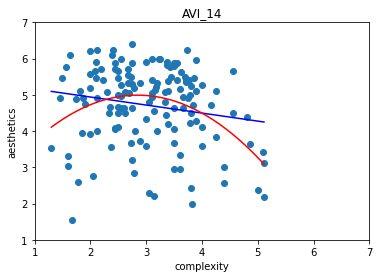

In [277]:
X_AVI = AVI_dataset[['complexity_average']]
y_AVI = AVI_dataset[['aethetics_average']]

linreg_AVI = LinearRegression()
linreg_AVI.fit(X_AVI, y_AVI)
linreg_AVI.score(X_AVI, y_AVI)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(x.values.reshape(140,1))

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y)

xx = np.linspace(x.values.min(),x.values.max(),140)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
yy_quadratic = regressor_quadratic.predict(xx_quadratic)

plt.axis([1, 7, 1, 7])
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('AVI_14')

yy_linreg_AVI = linreg_AVI.predict(xx.reshape(-1,1))
plt.plot(xx,yy_linreg_AVI, c='b')

plt.scatter(x, y)
plt.plot(xx,yy_quadratic,c='r',linestyle='-')
# print(xx, yy_quadratic[139])


In [148]:
regressor_quadratic.score(X_train_quadratic, y.values)

0.12877971117894726

In [218]:
regressor_quadratic.coef_

array([[ 0.        ,  2.10863062, -0.37069027]])

In [256]:
regressor_quadratic.intercept_

array([1.99265416])

In [259]:
CHI_dataset = df[df['stimulusId'].str.startswith('CHI_13')]
CHI_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('CHI_13')]
CHI_dataset['aesthetics'] = CHI_dataset_aesthetics['average']
CHI_dataset['complexity_2'] = CHI_dataset['average']**2
CHI_dataset = CHI_dataset[['stimulusId', 'average', 'complexity_2', 'aesthetics']]

# len(CHI_dataset)
# CHI_dataset

<ipython-input-259-98b90cf4a709>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_dataset['aesthetics'] = CHI_dataset_aesthetics['average']
<ipython-input-259-98b90cf4a709>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_dataset['complexity_2'] = CHI_dataset['average']**2


In [260]:
X_CHI = CHI_dataset[['average']]
y_CHI = CHI_dataset[['aesthetics']]

linreg_CHI = LinearRegression()
linreg_CHI.fit(X_CHI, y_CHI)
linreg_CHI.score(X_CHI, y_CHI)


0.012688572713369206

0.04110466940261148

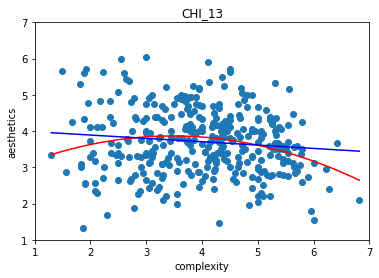

In [261]:
quadratic_featurizer_CHI = PolynomialFeatures(degree=2)
X_train_quadratic_CHI = quadratic_featurizer_CHI.fit_transform(X_CHI.values.reshape(350,1))

regressor_quadratic_CHI = LinearRegression()
regressor_quadratic_CHI.fit(X_train_quadratic_CHI,y_CHI)

xx_CHI = np.linspace(X_CHI.values.min(),X_CHI.values.max(),350)
xx_quadratic_CHI = quadratic_featurizer_CHI.transform(xx_CHI.reshape(xx_CHI.shape[0],1))
yy_quadratic_CHI = regressor_quadratic_CHI.predict(xx_quadratic_CHI)

plt.axis([1, 7, 1, 7])
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('CHI_13')

plt.scatter(X_CHI, y_CHI)
plt.plot(xx_CHI,yy_quadratic_CHI,c='r',linestyle='-')

yy_linreg_CHI = linreg_CHI.predict(xx_CHI.reshape(-1,1))
plt.plot(xx_CHI,yy_linreg_CHI, c='b')
regressor_quadratic_CHI.score(X_train_quadratic_CHI, y_CHI.values)

In [230]:
CHI_dataset.corr()
pearsonr(CHI_dataset['average'],CHI_dataset['aesthetics'])

(-0.11264356489995143, 0.03515763156379949)

In [262]:
CHI_dataset.to_csv('./CHI_13.csv')

In [263]:
CHI_dataset = df[df['stimulusId'].str.startswith('CHI_15')]
CHI_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('CHI_15')]
CHI_dataset['aesthetics'] = CHI_dataset_aesthetics['average']
CHI_dataset['complexity_2'] = CHI_dataset['average']**2
CHI_dataset = CHI_dataset[['stimulusId', 'average', 'complexity_2', 'aesthetics']]

X_CHI = CHI_dataset[['average']]
y_CHI = CHI_dataset[['aesthetics']]

linreg_CHI = LinearRegression()
linreg_CHI.fit(X_CHI, y_CHI)
linreg_CHI.score(X_CHI, y_CHI)


<ipython-input-263-ef6b58d210c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_dataset['aesthetics'] = CHI_dataset_aesthetics['average']
<ipython-input-263-ef6b58d210c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_dataset['complexity_2'] = CHI_dataset['average']**2


0.20314071086093155

In [264]:
len(CHI_dataset)

75

0.21696443795379505

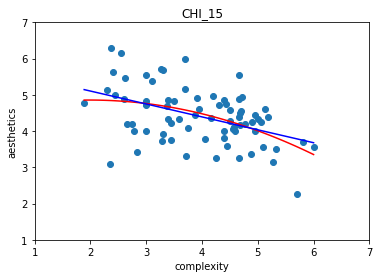

In [265]:
quadratic_featurizer_CHI = PolynomialFeatures(degree=2)
X_train_quadratic_CHI = quadratic_featurizer_CHI.fit_transform(X_CHI.values.reshape(75,1))

regressor_quadratic_CHI = LinearRegression()
regressor_quadratic_CHI.fit(X_train_quadratic_CHI,y_CHI)

xx_CHI = np.linspace(X_CHI.values.min(),X_CHI.values.max(),75)
xx_quadratic_CHI = quadratic_featurizer_CHI.transform(xx_CHI.reshape(xx_CHI.shape[0],1))
yy_quadratic_CHI = regressor_quadratic_CHI.predict(xx_quadratic_CHI)

plt.axis([1, 7, 1, 7])
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('CHI_15')

plt.scatter(X_CHI, y_CHI)
plt.plot(xx_CHI,yy_quadratic_CHI,c='r',linestyle='-')

yy_linreg_CHI = linreg_CHI.predict(xx_CHI.reshape(-1,1))
plt.plot(xx_CHI,yy_linreg_CHI, c='b')
regressor_quadratic_CHI.score(X_train_quadratic_CHI, y_CHI.values)

In [268]:
CHI_dataset.corr()
pearsonr(CHI_dataset['average'],CHI_dataset['aesthetics'])

(-0.4507113387312679, 4.9539978532376636e-05)

In [269]:
CHI_dataset.to_csv('CHI_15.csv')

In [177]:
IJHCS_dataset = df[df['stimulusId'].str.startswith('IJHCS_12')]
IJHCS_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('IJHCS_12')]
IJHCS_dataset['aesthetics'] = IJHCS_dataset_aesthetics['average']
IJHCS_dataset['complexity_2'] = IJHCS_dataset['average']**2
IJHCS_dataset = IJHCS_dataset[['stimulusId', 'average', 'complexity_2', 'aesthetics']]

X_IJHCS = IJHCS_dataset[['average']]
y_IJHCS = IJHCS_dataset[['aesthetics']]

linreg_IJHCS = LinearRegression()
linreg_IJHCS.fit(X_IJHCS, y_IJHCS)
linreg_IJHCS.score(X_IJHCS, y_IJHCS)

<ipython-input-177-c38f9b54c227>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IJHCS_dataset['aesthetics'] = IJHCS_dataset_aesthetics['average']
<ipython-input-177-c38f9b54c227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IJHCS_dataset['complexity_2'] = IJHCS_dataset['average']**2


0.03352549418188777

In [270]:
IJHCS_dataset.corr()
pearsonr(IJHCS_dataset['average'],IJHCS_dataset['aesthetics'])

(-0.18309968372962274, 0.012852595917053192)

0.03843305703222122

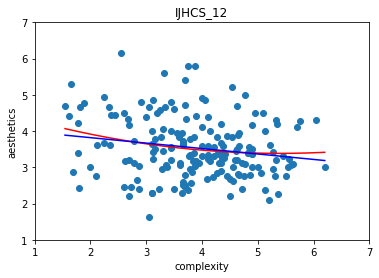

In [187]:
quadratic_featurizer_IJHCS = PolynomialFeatures(degree=2)
X_train_quadratic_IJHCS = quadratic_featurizer_IJHCS.fit_transform(X_IJHCS.values.reshape(len(IJHCS_dataset),1))

regressor_quadratic_IJHCS = LinearRegression()
regressor_quadratic_IJHCS.fit(X_train_quadratic_IJHCS,y_IJHCS)

xx_IJHCS = np.linspace(X_IJHCS.values.min(),X_IJHCS.values.max(),len(IJHCS_dataset))

xx_quadratic_IJHCS = quadratic_featurizer_IJHCS.transform(xx_IJHCS.reshape(xx_IJHCS.shape[0],1))
yy_quadratic_IJHCS = regressor_quadratic_IJHCS.predict(xx_quadratic_IJHCS)

plt.axis([1, 7, 1, 7])

plt.scatter(X_IJHCS, y_IJHCS)
plt.plot(xx_IJHCS,yy_quadratic_IJHCS,c='r',linestyle='-')
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('IJHCS_12')

yy_linreg_IJHCS = linreg_IJHCS.predict(xx_IJHCS.reshape(-1,1))
plt.plot(xx_IJHCS,yy_linreg_IJHCS, c='b')
regressor_quadratic_IJHCS.score(X_train_quadratic_IJHCS, y_IJHCS.values)

In [258]:
regressor_quadratic_IJHCS.coef_

array([[ 0.        , -0.49791282,  0.04617703]])

In [253]:
IJHCS_dataset.corr('spearman') 
import csv
IJHCS_dataset.to_csv('test.csv')

In [246]:
import pandas as pd
import numpy as np
  
#原始数据
X1=pd.Series([1, 2, 3, 4, 5, 6])
Y1=pd.Series([0.3, 0.9, 2.7, 2, 3.5, 5])
  
#处理数据删除Nan
x1=X1.dropna()
y1=Y1.dropna()
n=x1.count()
x1.index=np.arange(n)
y1.index=np.arange(n)
print(x1)
  
#分部计算
# d=(x1.sort_values().index-y1.sort_values().index)**2
# dd=d.to_series().sum()
  
# p=1-n*dd/(n*(n**2-1))
  
# #s.corr()函数计算
# r=x1.corr(y1,method='spearman')
# print(r,p) #0.942857142857143 0.9428571428571428

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64


<ipython-input-205-9f0a7b05a3cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICWE_dataset['aesthetics'] = ICWE_dataset_aesthetics['average']
<ipython-input-205-9f0a7b05a3cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICWE_dataset['complexity_2'] = ICWE_dataset['average']**2


0.06084158873525036

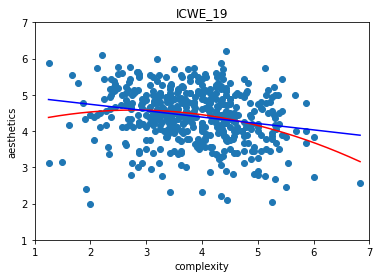

In [205]:
ICWE_dataset = df[df['stimulusId'].str.startswith('ICWE_19')]
ICWE_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('ICWE_19')]
ICWE_dataset['aesthetics'] = ICWE_dataset_aesthetics['average']
ICWE_dataset['complexity_2'] = ICWE_dataset['average']**2
ICWE_dataset = ICWE_dataset[['stimulusId', 'average', 'complexity_2', 'aesthetics']]

X_ICWE = ICWE_dataset[['average']]
y_ICWE = ICWE_dataset[['aesthetics']]

linreg_ICWE = LinearRegression()
linreg_ICWE.fit(X_ICWE, y_ICWE)
linreg_ICWE.score(X_ICWE, y_ICWE)

quadratic_featurizer_ICWE = PolynomialFeatures(degree=2)
X_train_quadratic_ICWE = quadratic_featurizer_ICWE.fit_transform(X_ICWE.values.reshape(len(ICWE_dataset),1))

regressor_quadratic_ICWE = LinearRegression()
regressor_quadratic_ICWE.fit(X_train_quadratic_ICWE,y_ICWE)

xx_ICWE = np.linspace(X_ICWE.values.min(),X_ICWE.values.max(),len(ICWE_dataset))

xx_quadratic_ICWE = quadratic_featurizer_ICWE.transform(xx_ICWE.reshape(xx_ICWE.shape[0],1))
yy_quadratic_ICWE = regressor_quadratic_ICWE.predict(xx_quadratic_ICWE)

plt.axis([1, 7, 1, 7])

plt.scatter(X_ICWE, y_ICWE)
plt.plot(xx_ICWE,yy_quadratic_ICWE,c='r',linestyle='-')
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('ICWE_19')

yy_linreg_ICWE = linreg_ICWE.predict(xx_ICWE.reshape(-1,1))
plt.plot(xx_ICWE,yy_linreg_ICWE, c='b')
regressor_quadratic_ICWE.score(X_train_quadratic_ICWE, y_ICWE.values)

In [206]:
linreg_ICWE.score(X_ICWE, y_ICWE)

0.0448899604261489

In [255]:
ICWE_dataset.to_csv('2.csv')

In [271]:
pearsonr(ICWE_dataset['average'],ICWE_dataset['aesthetics'])

(-0.21187250984058503, 1.9741936376934013e-06)

<ipython-input-195-ebe154473bf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_20_dataset['aesthetics'] = CHI_20_dataset_aesthetics['average']
<ipython-input-195-ebe154473bf2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHI_20_dataset['complexity_2'] = CHI_20_dataset['average']**2


0.006919360475059588

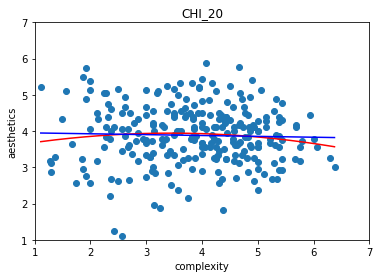

In [195]:
CHI_20_dataset = df[df['stimulusId'].str.startswith('CHI_20')]
CHI_20_dataset_aesthetics = df_aesthetics[df_aesthetics['stimulusId'].str.startswith('CHI_20')]
CHI_20_dataset['aesthetics'] = CHI_20_dataset_aesthetics['average']
CHI_20_dataset['complexity_2'] = CHI_20_dataset['average']**2
CHI_20_dataset = CHI_20_dataset[['stimulusId', 'average', 'complexity_2', 'aesthetics']]

X_CHI_20 = CHI_20_dataset[['average']]
y_CHI_20 = CHI_20_dataset[['aesthetics']]

linreg_CHI_20 = LinearRegression()
linreg_CHI_20.fit(X_CHI_20, y_CHI_20)
linreg_CHI_20.score(X_CHI_20, y_CHI_20)

quadratic_featurizer_CHI_20 = PolynomialFeatures(degree=2)
X_train_quadratic_CHI_20 = quadratic_featurizer_CHI_20.fit_transform(X_CHI_20.values.reshape(len(CHI_20_dataset),1))

regressor_quadratic_CHI_20 = LinearRegression()
regressor_quadratic_CHI_20.fit(X_train_quadratic_CHI_20,y_CHI_20)

xx_CHI_20 = np.linspace(X_CHI_20.values.min(),X_CHI_20.values.max(),len(CHI_20_dataset))

xx_quadratic_CHI_20 = quadratic_featurizer_CHI_20.transform(xx_CHI_20.reshape(xx_CHI_20.shape[0],1))
yy_quadratic_CHI_20 = regressor_quadratic_CHI_20.predict(xx_quadratic_CHI_20)

plt.axis([1, 7, 1, 7])

plt.scatter(X_CHI_20, y_CHI_20)
plt.plot(xx_CHI_20,yy_quadratic_CHI_20,c='r',linestyle='-')
plt.xlabel('complexity')
plt.ylabel('aesthetics')
plt.title('CHI_20')

yy_linreg_CHI_20 = linreg_CHI_20.predict(xx_CHI_20.reshape(-1,1))
plt.plot(xx_CHI_20,yy_linreg_CHI_20, c='b')
regressor_quadratic_CHI_20.score(X_train_quadratic_CHI_20, y_CHI_20.values)

In [203]:
linreg_CHI_20.score(X_CHI_20, y_CHI_20)

0.0010445756251884486

In [207]:
regressor_quadratic_CHI_20.coef_

array([[ 0.        ,  0.29880341, -0.04347827]])

In [216]:
CHI_20_dataset.corr()

,average,complexity_2,aesthetics
average,1.000000,0.985132,-0.032320
complexity_2,0.985132,1.000000,-0.045007
aesthetics,-0.032320,-0.045007,1.000000


In [272]:
pearsonr(CHI_20_dataset['average'], CHI_20_dataset['aesthetics'])

(-0.03231989519148393, 0.6025215159278904)

In [273]:
CHI_20_dataset.to_csv('./CHI_20.csv')

In [274]:
df_tech = pd.read_table('dataverse_files/techCond.txt', sep='\t')

In [ ]:
AVI_tech = df_tech[df_tech['stimulusId'].str.startswith('AVI_14')]
df_aesthetics['sum'] = df_aesthetics.iloc[:,1:].apply(lambda row: row.sum(),axis=1)
df_aesthetics['not_na'] = df_aesthetics.iloc[:,1:-1].apply(lambda row:sum(pd.notnull(row)),axis=1)
df_aesthetics['average'] = df_aesthetics['sum'] / df_aesthetics['not_na']